In [1]:
#Autoreload to be able to tweak source code in the fly without restarting kernel
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import aligater as ag

In [4]:
fcsDF = ag.loadFCS("/media/ludvig/Project_Storage/GAIM/data/GAIM_fcs/01-03-2016/plate 1/B cells_A2_A02_030.fcs")

Loaded dataset with 279440 events.
Marker labels: IgA CD27 CD34 CD19 IgD CD45 CD38 CD24 

Completely ungated

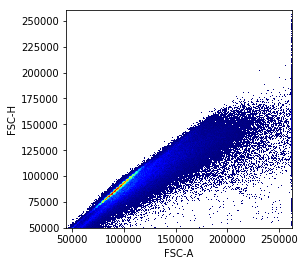

In [5]:
fig, ax = ag.plotHeatmap(fcsDF,"FSC-A", "FSC-H")

Lets remove those stacked values along the far right edge

After gating, 277035 out of 279440 events remain.

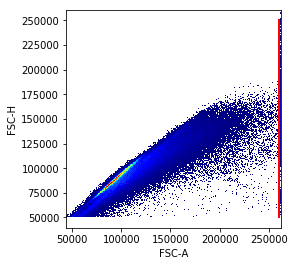

In [6]:
no_clutter=ag.gateThreshold(fcsDF,"FSC-A",thresh=260000,population="lower")
ag.addLine(fig,ax,[260000,50000],[260000,250000])

More work needed on the gaussian mixed modelling

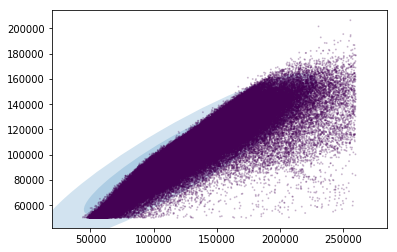

In [34]:
ag.gaussianMM2D(fcsDF, "FSC-A", "FSC-H", nOfComponents=1, sigma=100, vI=no_clutter)

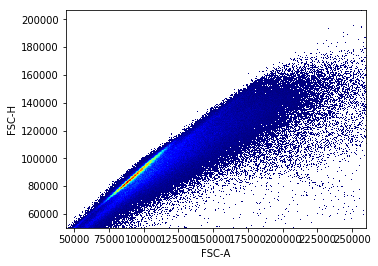

In [8]:
fig, ax = ag.plotHeatmap(fcsDF,"FSC-A", "FSC-H", vI=no_clutter)

Much better, let's calculate some PCs

In [9]:
barycenter, eigen1, eigen2 = ag.getPCs(fcsDF, "FSC-A", "FSC-H", vI=no_clutter)
barycenter

[118482.42266131197, 97096.391709700489]

In [10]:
PC1, PC2 = ag.getPCSemiAxis(barycenter, eigen1, eigen2, 3, 3)

In [11]:
axis1=ag.getVectorLength(barycenter, PC1)
axis2=ag.getVectorLength(barycenter, PC2)
angle=ag.calculateAngle(barycenter, PC1)

In [12]:
singlets = ag.gateEllipsoid(fcsDF, "FSC-A", "FSC-H",xCenter=barycenter[0],yCenter=barycenter[1],majorRadii=axis1, minorRadii=axis2,theta=angle,vI=no_clutter)

After gating, 269777 out of 277035 events remain.

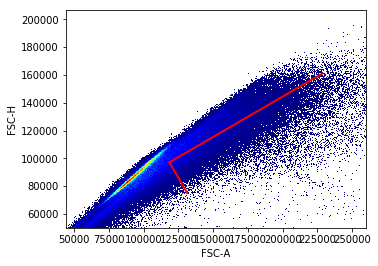

In [13]:
ag.addLine(fig, ax, barycenter, PC1)
ag.addLine(fig, ax, barycenter, PC2)

And with an ellipse around those:

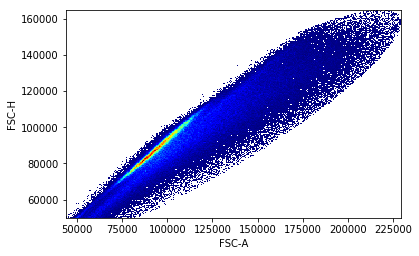

(<matplotlib.figure.Figure at 0x7f23a89c2710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23a8a5bf98>)

In [14]:
ag.plotHeatmap(fcsDF, "FSC-A", "FSC-H", singlets)

The same thing but try to anchor to the highest density point instead

In [15]:
density=ag.getHighestDensityPoint(fcsDF, "FSC-A", "FSC-H", no_clutter)

In [16]:
center, eigen1, eigen2 = ag.getPCs(fcsDF, "FSC-A", "FSC-H", density, vI=no_clutter)

In [17]:
PC1, PC2 = ag.getPCSemiAxis(density, eigen1, eigen2, 3, 3)

In [18]:
axis1=ag.getVectorLength(density, PC1)
axis2=ag.getVectorLength(density, PC2)
angle=ag.calculateAngle(density, PC1)

In [19]:
singletsDensity = ag.gateEllipsoid(fcsDF, "FSC-A", "FSC-H",xCenter=density[0],yCenter=density[1],majorRadii=axis1, minorRadii=axis2,theta=angle,vI=no_clutter)

After gating, 259345 out of 277035 events remain.

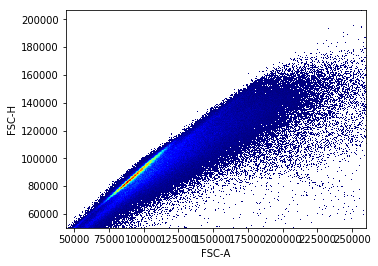

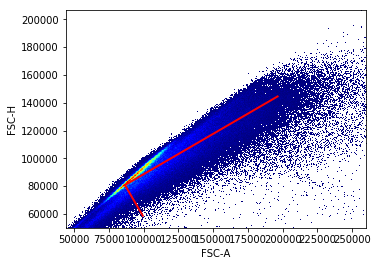

In [20]:
fig, ax = ag.plotHeatmap(fcsDF,"FSC-A", "FSC-H", vI=no_clutter)
ag.addLine(fig, ax, density, PC1)
ag.addLine(fig, ax, density, PC2)

Gated:

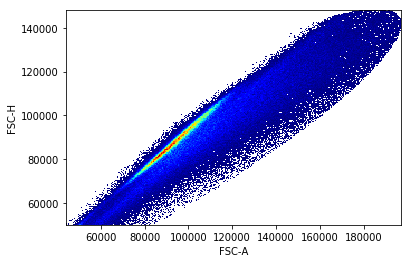

(<matplotlib.figure.Figure at 0x7f23a7d1d7f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23a7cdb668>)

In [21]:
ag.plotHeatmap(fcsDF, "FSC-A", "FSC-H", singletsDensity)

What happens if we instead use a 2d gaussian mixture model?